# Shared Variables and Functions for Main.ipynb and SI.ipynb

## Initializations

In [1]:
# import modules
import numpy as np
## perform symbolic calculations
from sympy import * 
## plot figures
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.patches as mpatches
from matplotlib.collections import PolyCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable, inset_locator
### colormap
from matplotlib import cm 
from matplotlib import colors as mcolors
### 3d plot
from mpl_toolkits.mplot3d import axes3d 
from mpl_toolkits.mplot3d import art3d
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams['font.sans-serif'] = "Arial"
rcParams['font.family'] = "sans-serif"
rcParams['hatch.linewidth'] = 3
## compress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# default colors of matplotlib
prop_cycle = plt.rcParams['axes.prop_cycle'] 
colors = prop_cycle.by_key()['color']
colors = ['C0', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [3]:
# save figures in the folder
_Figure_PATH_ = './figures/SI/'

## Symbols

In [4]:
# define symbols
p_0, q_0 = symbols('p_0, q_0') # initial probabilities to cooperate for player X and player Y
p, q = symbols('p, q') # probabilities to cooperate for player X and player Y
p_1, p_2, p_3, p_4 = symbols('p_1, p_2, p_3, p_4', real = True) # probabilities to cooperate for player X
q_1, q_2, q_3, q_4 = symbols('q_1, q_2, q_3, q_4', real = True) # probabilities to cooperate for player Y
R, S, T, P, O = symbols('R, S, T, P, O', real = True) # payoffs for the Prisoner's Dilemma
alpha, beta, gamma = symbols('alpha, beta, gamma', real = True) # parameters for the linear equation alpha*s_X + beta*s_Y + gamma = 0
phi, chi = symbols('phi, chi', real = True) # parameters for the linear equation (s_X - O) = chi*(s_Y - O)
b, c, r = symbols('b, c, r', real = True) # parameters (benefit, cost, and their ratio: b/c) for the donation game
delta, epsilon = symbols('delta, epsilon', real = True) # two infinitesimal quantities which approaches 0

init_printing(use_unicode = True) # for a good presentation of mathematics

In [5]:
# assign values to the four probabilities q_1, q_2, q_3, q_4
## common strategies
Cooperator_q = [(q_1, 1), (q_2, 1), (q_3, 1), (q_4, 1)] 
Defector_q = [(q_1, 0), (q_2, 0), (q_3, 0), (q_4, 0)]
PSOGamblerMem1_q = [(q_1, 1.0), (q_2, 0.52173487), (q_3, 0), (q_4, 0.12050939)]
Random_q = [(q_1, 1/2), (q_2, 1/2), (q_3, 1/2), (q_4, 1/2)]
TitForTat_q = [(q_1, 1), (q_2, 0), (q_3, 1), (q_4, 0)]
Willing_q = [(q_1, 1), (q_2, 1), (q_3, 1), (q_4, 0)]
WinStayLoseShift_q = [(q_1, 1), (q_2, 0), (q_3, 0), (q_4, 1)]
ZDGEN2_q = [(q_1, 1), (q_2, 9/16), (q_3, 1/2), (q_4, 1/8)]
## other strategies
q_subs_1 = [(q_1, 0.05), (q_2, 0.95), (q_3, 0.05), (q_4, 0.1)]
q_subs_2 = [(q_1, 0.4), (q_2, 0.1), (q_3, 0.9), (q_4, 0.2)]
q_subs_3 = [(q_1, 0.1), (q_2, 0.3), (q_3, 0.9), (q_4, 0.35)]
q_subs_4 = [(q_1, 0.6), (q_2, 0.4), (q_3, 0.9), (q_4, 0.8)]

In [6]:
# assign values to the four payoffs R, S, T, and P
payoff_con_subs = [(R, 3), (S, 0), (T, 5), (P, 1)] # conventional IPD game with T + S > 2P
payoff_eqn_subs = [(R, 3), (S, 0), (T, 5), (P, 2.5)] # IPD game with T + S = 2P
payoff_abn_subs = [(R, 1), (S, -3), (T, 2), (P, 0)] # IPD game with T + S < 2P
payoff_insane_subs = [(R, 2.35), (S, 0), (T, 2.4), (P, 1)] # IPD game with T + S > 2P and T close to R
payoff_dg_subs = [(R, b - c), (S, -c), (T, b), (P, 0)] # donation game
payoff_dg_r_subs = [(R, r - 1), (S, -1), (T, r), (P, 0)] # donation game with benefit-cost ratio r
payoff_dg_2_subs = [(R, 1), (S, -1), (T, 2), (P, 0)] # donation game with benefit-cost ratio r = 2
payoff_dg_4_subs = [(R, 3), (S, -1), (T, 4), (P, 0)] # donation game with benefit-cost ratio r = 4
payoff_dg_8_subs = [(R, 7), (S, -1), (T, 8), (P, 0)] # donation game with benefit-cost ratio r = 8
payoff_dg_16_subs = [(R, 15), (S, -1), (T, 16), (P, 0)] # donation game with benefit-cost ratio r = 16

In [7]:
# calculate expected payoffs of the two players X and Y
A_1 = Matrix([[-1 + p_1*q_1, -1 + p_1, -1 + q_1, 1], # 4*4 matrix with the determinant D(p, q, 1)
              [p_2*q_3, -1 + p_2, q_3, 1],
              [p_3*q_2, p_3, -1 + q_2, 1],
              [p_4*q_4, p_4, q_4, 1]])
A_X = Matrix([[-1 + p_1*q_1, -1 + p_1, -1 + q_1, R], # 4*4 matrix with the determinant D(p, q, S_X)
              [p_2*q_3, -1 + p_2, q_3, S],
              [p_3*q_2, p_3, -1 + q_2, T],
              [p_4*q_4, p_4, q_4, P]])
A_Y = Matrix([[-1 + p_1*q_1, -1 + p_1, -1 + q_1, R], # 4*4 matrix with the determinant D(p, q, S_Y)
              [p_2*q_3, -1 + p_2, q_3, T],
              [p_3*q_2, p_3, -1 + q_2, S],
              [p_4*q_4, p_4, q_4, P]])

s_X = A_X.det()/A_1.det() # payoff of player X
s_Y = A_Y.det()/A_1.det() # payoff of player Y

### Extortionate ZD strategies
> $s_X - P = \chi(s_Y - P)$

In [8]:
# expressions of p_1, p_2, p_3, and p_4
P_1 = 1 - (R - P)*phi*(chi - 1) 
P_2 = 1 - phi*((T - P)*chi + (P - S)) 
P_3 = phi*((P - S)*chi + (T - P)) 
P_4 = 0 
# extortionate ZD strategy
extortionate_ZD_p = [(p_1, P_1), (p_2, P_2), (p_3, P_3), (p_4, P_4)]
# upper bounds of phi
phi_upper_con = 1/(chi*(T - P) + (P - S)) # 0 < phi < phi_upper_con if T + S >= 2P
phi_upper_abn = 1/(chi*(P - S) + (T - P)) # 0 < phi < phi_upper_abn if T + S < 2P
# payoffs of player X and player Y if player X uses an extortionate ZD strategy
s_X_ext = cancel(s_X.subs(extortionate_ZD_p))
s_Y_ext = cancel(s_Y.subs(extortionate_ZD_p))

### General ZD strategies
> $s_X - O = \chi(s_Y - O)$

In [9]:
# expressions of p_1, p_2, p_3, and p_4
P_1 = 1 - (R - O)*phi*(chi - 1) 
P_2 = 1 - phi*((T - O)*chi + (O - S)) 
P_3 = phi*((O - S)*chi + (T - O)) 
P_4 = (O - P)*phi*(chi - 1)
# general ZD strategy
general_ZD_p = [(p_1, P_1), (p_2, P_2), (p_3, P_3), (p_4, P_4)]
# payoffs of player X and player Y if player X uses a general ZD strategy
s_X_gen = cancel(s_X.subs(general_ZD_p))
s_Y_gen = cancel(s_Y.subs(general_ZD_p))

### From ZD strategies to reactive strategies

* donation game 
> $[R, S, T, P] = [b - c, -c, b, 0]$

* a general ZD strategy
> $\begin{cases}
    p_1 = 1 - (R - O)\phi(\chi - 1), \\
    p_2 = 1 - \phi((T - O)\chi + (O - S)),\\
    p_3 = \phi((O - S)\chi + (T - O)), \\
    p_4 = (O - P)\phi(\chi - 1).
    \end{cases} \qquad P \leq O \leq R$

* a reactive strategy
> $p = [p_1, p_2, p_1, p_2]$

$\Rightarrow$

* a reactive ZD strategy

> $\phi = \frac{1}{b\chi + c}$ 

> $\begin{cases}
    p_1 = 1 - \frac{(b - c - O)(\chi - 1)}{b\chi + c}, \\
    p_2 = \frac{O(\chi - 1)}{b\chi + c}.
    \end{cases} \qquad \chi \geq 1 \qquad \text{and} \qquad 0 \leq O \leq b - c$
    
> $O(1 - p_1) - (b - c - O)p_2 = 0, \qquad 0 \leq p_2 \leq \frac{O}{b}$

In [10]:
# donation game
phi_dg_re = 1/(b*chi + c) # phi
# reactive ZD strategy
re_ZD_p = [(p_1, factor(general_ZD_p[0][1].subs(payoff_dg_subs).subs(phi, phi_dg_re))), 
           (p_2, factor(general_ZD_p[1][1].subs(payoff_dg_subs).subs(phi, phi_dg_re))), 
           (p_3, factor(general_ZD_p[2][1].subs(payoff_dg_subs).subs(phi, phi_dg_re))), 
           (p_4, factor(general_ZD_p[3][1].subs(payoff_dg_subs).subs(phi, phi_dg_re)))]
# payoffs of player X and player Y if player X uses a reactive strategy
s_X_re = cancel(s_X.subs(payoff_dg_subs).subs([(p_3, p_1), (p_4, p_2)]))
s_Y_re = cancel(s_Y.subs(payoff_dg_subs).subs([(p_3, p_1), (p_4, p_2)]))
# payoffs of player X and player Y if player X uses a reactive ZD strategy
s_X_re_ZD = cancel(s_X.subs(payoff_dg_subs).subs(re_ZD_p))
s_Y_re_ZD = cancel(s_Y.subs(payoff_dg_subs).subs(re_ZD_p))

## Plots

> To run an example, uncomment the corresponding code

In [12]:
def s_X_3D(s_X, payoff_subs, phi_upper, q_subs, cmap, fs = 13.5, tag = 1):
    '''
    3D surface of s_X with respect to chi and phi
    s_X: payoff of player X
    payoff_subs: values of the four payoffs R, S, T, and P
    phi_upper: upper bound of phi
    q_subs: values of the four probabilities q_1, q_2, q_3, and q_4 (strategy used by player Y)
    cmap: color map
    fs: font size
    tag: name of the plot
    '''
    lam_phi_upper = lambdify([chi], phi_upper.subs(payoff_subs))
    lam_flag = lambdify([chi, phi], phi_upper.subs(payoff_subs) - phi)
    lam_s_X = lambdify([chi, phi], cancel(s_X.subs(q_subs)).subs(payoff_subs))
    error = 1e-3
    X = np.linspace(1 + error, 5, 801)
    Y = np.linspace(error, lam_phi_upper(1 + error), 801)
    X, Y = np.meshgrid(X, Y)
    Z = lam_s_X(X, Y)
    if q_subs[3][1] == 0: # in case s_X is a constant
        Z = np.full(X.shape, lam_s_X(X, Y))
    indices = lam_flag(X, Y) < 0 # where phi > phi_upper
    for i in range(0, indices.shape[0]):
        for j in range(0, indices.shape[1]):
            if indices[i][j] == True:
                X[i][j] = X[i][j-1]
                Y[i][j] = Y[i][j-1]
                Z[i][j] = Z[i][j-1]
    offset = 1
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    ax = fig.gca(projection = '3d')
    #ax.set_box_aspect((1.25, 1, 0.75))
    surf = ax.plot_surface(X, Y, Z, cmap = cmap, edgecolor = 'none', alpha = 0.8)
    ax.contour(X, Y, Z, 10, cmap = cmap, linestyles = "solid", offset = Z.min() - offset)
    if tag == 'A_abn_1':
        def truncate_colormap(cmap, minval = 0.0, maxval = 1.0, n = 100):
            new_cmap = mcolors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n = cmap.name, a = minval, b = maxval), cmap(np.linspace(minval, maxval, n)))
            return new_cmap
        new_cmap = truncate_colormap(plt.get_cmap(cmap), 0.3, 0.2)
        X = np.linspace(1, 5, 501)
        Y = np.linspace(error, lam_phi_upper(1 + error), 501)
        X, Y = np.meshgrid(X, Y)
        ZZ = np.ones(X.shape)*payoff_subs[3][1] # add the plane z = P
        ax.plot_surface(X, Y, ZZ, cmap = new_cmap, edgecolor = 'none', alpha = 0.4)
    ax.set_xlim3d(1, 5)
    ax.set_xlabel(r'$\chi$', fontsize = fs - 2)
    ax.set_ylim3d(0, lam_phi_upper(1 + error))
    ax.set_ylabel(r'$\phi$', fontsize = fs - 2)
    ax.set_zlim3d(Z.min() - offset, Z.max())
    ax.set_zlabel('Payoff of extortioner, ' + r'$s_X$', fontsize = fs - 2, labelpad = 5)
    title = [q_subs[0][1], q_subs[1][1], q_subs[2][1], q_subs[3][1]]
    title = [str(v) for v in title]
    title = r'$, $'.join(title) 
    ax.set_title(r'$q = ($' + title + r'$)$', fontsize = fs - 2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.1)
    ax.spines['left'].set_linewidth(0.1)
    plt.locator_params(nbins = 5)
    fig.colorbar(surf, shrink = 0.5, aspect = 10, pad = 0.1)
    ax.azim = -60 # default: -60
    ax.dist = 10 # default: 10
    ax.elev = 30 # default: 30
    plt.savefig(_Figure_PATH_ + 'payoff_3D_' + str(tag) + '.png', dpi = 400, facecolor = fig.get_facecolor(), edgecolor = 'none', transparent = True, bbox_inches = 'tight')
    plt.show()

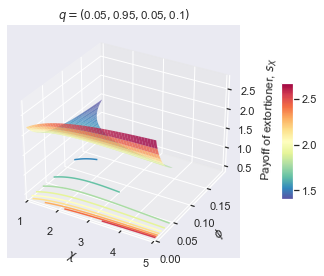

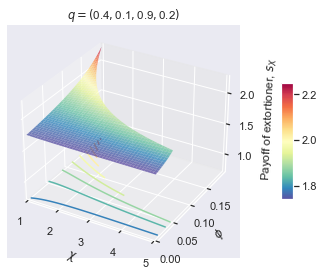

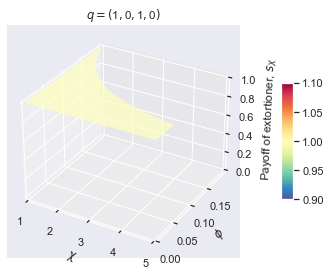

In [13]:
# examples
#s_X_3D(s_X_ext, payoff_con_subs, phi_upper_con, q_subs_1, 'Spectral_r', 13.5, 1)
#s_X_3D(s_X_ext, payoff_con_subs, phi_upper_con, q_subs_2, 'Spectral_r', 13.5, 2)
#s_X_3D(s_X_ext, payoff_con_subs, phi_upper_con, TitForTat_q, 'Spectral_r', 13.5, 'TFT')

In [14]:
def s_Y_3D(s_Y, payoff_subs, phi_upper, q_subs, cmap, fs = 13.5, tag = 1):
    '''
    3D surface of s_Y with respect to chi and phi
    s_Y: payoff of player Y
    payoff_subs: values of the four payoffs R, S, T, and P
    phi_upper: upper bound of phi
    q_subs: values of the four probabilities q_1, q_2, q_3, and q_4 (strategy used by player Y)
    cmap: color map
    fs: font size
    tag: name of the plot
    '''
    lam_phi_upper = lambdify([chi], phi_upper.subs(payoff_subs))
    lam_flag = lambdify([chi, phi], phi_upper.subs(payoff_subs) - phi)
    lam_s_Y = lambdify([chi, phi], cancel(s_Y.subs(q_subs)).subs(payoff_subs))
    error = 5e-3
    X = np.linspace(1 + error, 5, 801)
    Y = np.linspace(error, lam_phi_upper(1 + error), 801)
    X, Y = np.meshgrid(X, Y)
    Z = lam_s_Y(X, Y)
    if q_subs[3][1] == 0: # in case s_X is a constant
        Z = np.full(X.shape, lam_s_Y(X, Y))
    indices = lam_flag(X, Y) <= 0 # where phi > phi_upper
    for i in range(0, indices.shape[0]):
        for j in range(0, indices.shape[1]):
            if indices[i][j] == True:
                X[i][j] = X[i][j-1]
                Y[i][j] = Y[i][j-1]
                Z[i][j] = Z[i][j-1]
    offset = 1
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    ax = fig.gca(projection = '3d')
    #ax.set_box_aspect((1.25, 1, 0.75))
    surf = ax.plot_surface(X, Y, Z, cmap = cmap, edgecolor = 'none', alpha = 0.8)
    ax.contour(X, Y, Z, 10, cmap = cmap, linestyles = "solid", offset = Z.min() - offset)
    if tag == 'A_abn_1':
        def truncate_colormap(cmap, minval = 0.0, maxval = 1.0, n = 100):
            new_cmap = mcolors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n = cmap.name, a = minval, b = maxval), cmap(np.linspace(minval, maxval, n)))
            return new_cmap
        new_cmap = truncate_colormap(plt.get_cmap(cmap), 0.3, 0.2)
        X = np.linspace(1,5,501)
        Y = np.linspace(error, lam_phi_upper(1 + error), 501)
        X, Y = np.meshgrid(X, Y)
        ZZ = np.ones(X.shape)*payoff_subs[3][1] # add the plane z = P
        ax.plot_surface(X, Y, ZZ, cmap = new_cmap, edgecolor = 'none', alpha = 0.4)
    ax.set_xlim3d(1, 5)
    ax.set_xlabel(r'$\chi$', fontsize = fs - 2)
    ax.set_ylim3d(0, lam_phi_upper(1 + error))
    ax.set_ylabel(r'$\phi$', fontsize = fs - 2)
    ax.set_zlim3d(Z.min() - offset, Z.max())
    ax.set_zlabel('Payoff of co-player, ' + r'$s_Y$', fontsize = fs - 2, labelpad = 5)
    title = [q_subs[0][1], q_subs[1][1], q_subs[2][1], q_subs[3][1]]
    title = [str(v) for v in title]
    title = r'$, $'.join(title) 
    ax.set_title(r'$q = ($' + title + r'$)$', fontsize = fs - 2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.1)
    ax.spines['left'].set_linewidth(0.1)
    plt.locator_params(nbins = 5)
    fig.colorbar(surf, shrink = 0.5, aspect = 10, pad = 0.1)
    plt.savefig(_Figure_PATH_ + 'payoff_3D_Y_' + str(tag) + '.png', dpi = 400, facecolor = fig.get_facecolor(), edgecolor = 'none', transparent = True, bbox_inches = 'tight')
    plt.show()

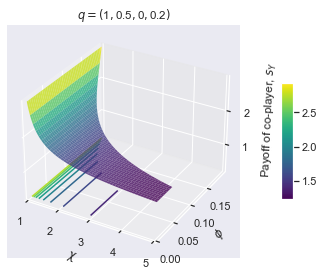

In [15]:
# an example
#s_Y_3D(s_Y_ext, payoff_con_subs, phi_upper_con, [(q_1, 1), (q_2, 0.5), (q_3, 0), (q_4, 0.2)], 'viridis', 13.5, 'A_con')

In [16]:
def s_X_2D(s_X, payoff_subs, chi_subs, phi_upper, q_subs_list, names_list, fs = 15, name = 'con_phi'):
    '''
    2D curve of s_X with respect to phi
    s_X: payoff of player X
    payoff_subs: values of the four payoffs R, S, T, and P
    phi_upper: upper bound of phi
    q_subs_list: list of strategies used by player Y
    names_list: list of names of strategies used by player Y
    fs: font size
    name: name of the plot
    '''
    s_X_temp = cancel(s_X.subs(chi_subs).subs(payoff_subs))
    error = 1e-2
    lam_phi_upper = lambdify([chi], phi_upper.subs(payoff_subs))
    x = np.linspace(error, lam_phi_upper(chi_subs[0][1]), 1001)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i, q_subs in enumerate(q_subs_list):
        lam_s_X = lambdify([phi], cancel(s_X_temp.subs(q_subs)))
        y = lam_s_X(x)
        if q_subs[3][1] == 0: # in case s_X is a constant
            y = np.linspace(lam_s_X(x), lam_s_X(x), 1001)
        ax.plot(x, y, linewidth = 2, color = colors[i], label = names_list[i])
    plt.xlabel(r'$\phi$', fontsize = fs - 2)
    plt.ylabel('Payoff of extortioner, ' + r'$s_X$', fontsize = fs - 2)
    plt.legend(loc = 'upper center', ncol = 4, fancybox = True, fontsize = fs - 4)
    title = [payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]]
    title = [str(v) for v in title]
    title = r'$, $'.join(title) 
    plt.title(r'$(R, S, T, P) = ($' + title + r'$)$' + '    ' + r'$\chi = $' + str(chi_subs[0][1]), fontsize = fs - 2)
    plt.savefig(_Figure_PATH_ + name + '.png', dpi = 400, bbox_inches = 'tight')
    plt.show()

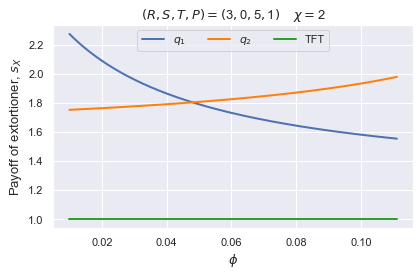

In [17]:
# an example
#q_subs_list = [q_subs_1, q_subs_2, TitForTat_q]
#s_X_2D(s_X_ext, payoff_con_subs, [(chi, 2)], phi_upper_con, q_subs_list, [r'$q_1$', r'$q_2$', 'TFT'])

In [43]:
def s_X_poly(s_X, payoff_subs, phi_upper, q_subs, fs = 15, tag = 1):
    '''
    3D waterfall plot of s_X
    s_X: payoff of player X
    payoff_subs: values of the four payoffs R, S, T, and P
    phi_upper: upper bound of phi
    q_subs: values of the four probabilities q_1, q_2, q_3, and q_4 (strategy used by player Y)
    fs: font size
    tag: name of the plot
    '''
    s_X_temp = cancel(s_X.subs(q_subs).subs(payoff_subs))
    error = 1e-5
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    ax = fig.gca(projection = '3d')
    #ax.set_box_aspect((1.25, 1, 0.75))
    cmap = cm.get_cmap('Spectral')
    verts = []
    chi_list = [2, 4, 6, 8, 10]
    s_X_min = payoff_subs[2][1]
    s_X_max = payoff_subs[1][1]
    for chi_single in chi_list:
        lam_phi_upper = lambdify([chi], phi_upper.subs(payoff_subs))
        xs = np.arange(error, lam_phi_upper(chi_single), 1e-5)
        lam_s_X = lambdify([phi], cancel(s_X_temp.subs(chi, chi_single)))
        ys = [lam_s_X(phi_single) for phi_single in xs]
        ys = np.asarray(ys, dtype = np.float64)
        if s_X_min > np.min(ys):
            s_X_min = np.min(ys)
        if s_X_max < np.max(ys):
            s_X_max = np.max(ys)
    zmin = np.round(s_X_min*0.99, 1)
    zmax = np.round(s_X_max*1.01, 1) 
    if zmin == zmax: # in case s_X is a constant
        zmin = s_X_min*0.95
        zmax = s_X_max*1.05
    for chi_single in chi_list:
        lam_phi_upper = lambdify([chi], phi_upper.subs(payoff_subs))
        xs = np.arange(error, lam_phi_upper(chi_single), 1e-5)
        lam_s_X = lambdify([phi], cancel(s_X_temp.subs(chi, chi_single)))
        ys = [lam_s_X(phi_single) for phi_single in xs]
        ys = np.asarray(ys, dtype = np.float64)
        ys[0], ys[-1] = zmin, zmin
        verts.append(list(zip(xs, ys)))
    poly = PolyCollection(verts, facecolors = [cmap(chi_single/10) for chi_single in chi_list])
    poly.set_alpha(0.6)
    ax.add_collection3d(poly, zs = chi_list, zdir = 'y')
    ax.set_xlabel(r'$\phi$', fontsize = fs - 2)
    ax.set_xlim3d(0, float(phi_upper.subs(payoff_subs).subs(chi, chi_list[0])))
    ax.set_ylabel(r'$\chi$', fontsize = fs - 2)
    ax.set_ylim3d(1, chi_list[-1] + 1)
    ax.set_zlabel('Payoff of extortioner, ' + r'$s_X$', fontsize = fs - 2)
    ax.set_zlim3d(zmin, zmax)
    ax.set_zticks(np.arange(zmin, zmax, (zmax - zmin)/5))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.1)
    ax.spines['left'].set_linewidth(0.1)
    title_dict = {1: r'$q_1$', 2: r'$q_2$', 'TFT': 'TFT'}
    ax.set_title(r'$q = $' + title_dict[tag], fontsize = fs - 2) 
    plt.savefig(_Figure_PATH_ + 'payoff_poly_' + str(tag) + '.png', dpi = 400, facecolor = fig.get_facecolor(), edgecolor = 'none', transparent = True, bbox_inches = 'tight')
    plt.show()

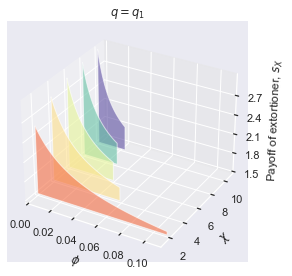

In [44]:
# an example
#s_X_poly(s_X_ext, payoff_con_subs, phi_upper_con, q_subs_1, 13.5, 1)

In [19]:
def payoff_quad(s_X, s_Y, payoff_subs, q_subs, tag, chi_1 = 1, zoom = False, ms = 5, fs = 11.5):
    '''
    Quadrilateral plot of s_X and s_Y
    s_X: payoff of player X
    s_Y: payoff of player Y
    payoff_subs: values of the four payoffs R, S, T, and P
    q_subs: values of the four probabilities q_1, q_2, q_3, and q_4 (strategy used by player Y)
    tag: name of the plot
    chi_1: value of chi at the transition point (from s_X > s_Y to s_X < s_Y)
    zoom: whether to zoom in and see the details of the plot
    ms: marker size
    fs: font size
    '''
    # use a different color scheme
    prop_cycle = plt.rcParams['axes.prop_cycle'] 
    colors = prop_cycle.by_key()['color']
    rr, ss = payoff_subs[0][1], payoff_subs[1][1]
    tt, pp = payoff_subs[2][1], payoff_subs[3][1]
    lam_s_X = lambdify([chi], cancel(s_X.subs(q_subs)).subs(payoff_subs))
    lam_s_Y = lambdify([chi], cancel(s_Y.subs(q_subs)).subs(payoff_subs))
    s_X_0, s_Y_0 = lam_s_X(1), lam_s_Y(1)
    s_X_1, s_Y_1 = lam_s_X(chi_1), lam_s_Y(chi_1)
    s_X_2, s_Y_2 = lam_s_X(5), lam_s_Y(5)
    s_X_3, s_Y_3 = lam_s_X(50), lam_s_Y(50)
    fig = plt.figure()
    ax = plt.gca()
    fig.patch.set_facecolor('white')
    plt.xlabel('Payoff of extortioner, ' + r'$s_X$', fontsize = fs)
    plt.ylabel('Payoff of co-player, ' + r'$s_Y$', fontsize = fs)
    if (tag == 'A_abn_1') | (tag == 'B_abn_2') | (tag == 'C_abn_1'): # under which s_X < s_Y is possible
        k = 0 
    else:
        k = 2
    if(zoom == True): # zoom in to see details 
        if ('con' in tag):
            plt.xlim(pp - 0.4, rr + 0.5)        
            plt.ylim(pp - 0.4, rr + 0.5)
            plt.text(pp - 0.15, pp - 0.15, r'$(P, P)$', fontsize = fs)
            plt.text(rr + 0.05, rr + 0.05, r'$(R, R)$', fontsize = fs)
        elif ('eqn' in tag):
            plt.xlim(pp - 0.1, rr + 0.15)        
            plt.ylim(pp - 0.1, rr + 0.15)
            plt.text(pp - 0.05, pp - 0.05, r'$(P, P)$', fontsize = fs)
            plt.text(rr + 0.02, rr + 0.02, r'$(R, R)$', fontsize = fs)
        elif (tag == 'A_abn_0'):
            plt.xlim(pp - 0.75, rr + 0.35)        
            plt.ylim(pp - 0.75, rr + 0.35)
            plt.text(pp - 0.15, pp - 0.15, r'$(P, P)$', fontsize = fs)
            plt.text(rr + 0.05, rr + 0.05, r'$(R, R)$', fontsize = fs)
        elif (tag[0] == 'B') | (tag == 'C_abn_1'):
            plt.xlim(pp - 0.55, pp + 0.2)        
            plt.ylim(pp - 0.55, pp + 0.2)
            plt.text(pp - 0.05, pp - 0.05, r'$(P, P)$', fontsize = fs)
        else:
            plt.xlim(pp - 0.55, rr + 0.35)        
            plt.ylim(pp - 0.55, rr + 0.35)
            plt.text(pp - 0.15, pp - 0.15, r'$(P, P)$', fontsize = fs)
            plt.text(rr + 0.05, rr + 0.05, r'$(R, R)$', fontsize = fs)
    else:
        plt.plot(ss, tt, c = colors[k], marker = '.', markersize = ms)
        plt.plot(tt, ss, c = colors[k], marker = '.', markersize = ms)
        plt.text(ss + 0.5, tt - 0.2, r'$(S, T)$', fontsize = fs)
        plt.text(tt - 1, ss, r'$(T, S)$', fontsize = fs)
        plt.text(rr + 0.1, rr + 0.1, r'$(R, R)$', fontsize = fs)
        plt.text(pp - 0.3, pp - 0.3, r'$(P, P)$', fontsize = fs)
    
    # the quadrilateral
    points = [[ss, tt], [rr, rr], [tt, ss], [pp, pp]]
    polygon = plt.Polygon(points, color = colors[k], ec = None, alpha = 0.2/(1 + zoom/2))
    ax.add_patch(polygon)
    # the line pointing from (R, R) to (P, P)
    line_0 = plt.Line2D((rr, pp), (rr, pp), c = colors[k], lw = 2*(1 + zoom/2), ls = '--', marker = '.', markersize = ms*(1 + zoom/2), alpha = 0.7)
    ax.add_line(line_0)
    # the payoffs when chi = 1 and chi = infty
    plt.plot(s_X_0, s_Y_0, c = 'r', marker = '.', markersize = ms*(1 + zoom/2))
    plt.plot(s_X_3, s_Y_3, c = 'r', marker = '.', markersize = ms*(1 + zoom/2))
    # the payoffs as chi varies from 1 to infty
    chi_list = np.linspace(1, 50, 1001)
    s_X_list = lam_s_X(chi_list)
    s_Y_list = lam_s_Y(chi_list)
    p = plt.plot(s_X_list, s_Y_list, c = 'r', lw = 2*(1 + zoom/2), alpha = 0.8)
    # add the transaction point
    if tag == 'A_abn_1':
        plt.plot(s_X_1, s_Y_1, c = colors[k], marker = '.', markersize = ms*(1 + zoom/2))
    # add the arrow
    if zoom == True:
        arrow_kw = dict(arrowstyle = '-|>', linewidth = 2*(1 + zoom/2), mutation_scale = 20)
        a = mpatches.FancyArrowPatch((s_X_2, s_Y_2), (s_X_3, s_Y_3), **arrow_kw, color = 'r')
        ax.add_patch(a)
    else:
        style = "Simple, tail_width = 2, head_width = 4, head_length = 3"
    # equalize the scales of x-axis and y-axis
    ax.set_aspect('equal', adjustable = 'box')
    title = [q_subs[0][1], q_subs[1][1], q_subs[2][1], q_subs[3][1]]
    title = [str(v) for v in title]
    title = r'$, $'.join(title) 
    plt.title(r'$q = ($' + title + r'$)$', fontsize = fs)
    if zoom == True:
        plt.savefig(_Figure_PATH_ + 'payoff_quad_' + str(tag) + '_zoom.png', dpi = 400, facecolor = fig.get_facecolor(), edgecolor = 'none', bbox_inches = 'tight')
    else:   
        plt.savefig(_Figure_PATH_ + 'payoff_quad_' + str(tag) + '.png', dpi = 400, facecolor = fig.get_facecolor(), edgecolor = 'none', bbox_inches = 'tight')
    plt.show()

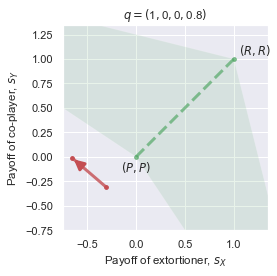

In [20]:
# an example
#payoff_quad(cancel(s_X_ext.subs([(q_1, 1), (q_3, 0)])), cancel(s_Y_ext.subs([(q_1, 1), (q_3, 0)])), 
            #payoff_abn_subs, [(q_1, 1), (q_2, 0), (q_3, 0), (q_4, 0.8)], 'A_abn_0', chi_1 = 1, zoom = True)

In [22]:
def payoff_1D(s_X, s_Y, payoff_subs, q_subs_list, names_list, chi_list_positive, chi_list_negative = [], tag = '', index = 0, job = 'X', fs = 15):
    '''
    1D curve of the payoff(s) with respect to chi
    s_X: payoff of player X
    s_Y: payoff of player Y
    payoff_subs: values of the four payoffs R, S, T, and P
    q_subs_list: list of strategies used by player Y
    names_list: list of names of strategies used by player Y
    chi_list_positive: range of chi (positive part)
    chi_list_negative: range of chi (negative part)
    tag: name of the plot
    index: color of the plot
    job: which payoff(s) to plot, s_X or s_X and s_Y
    '''
    s_X = simplify(s_X.subs(payoff_subs))
    s_Y = simplify(s_Y.subs(payoff_subs))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    if job == 'X':
        for i, q_subs in enumerate(q_subs_list):
            s_X_temp = cancel(simplify(s_X.subs(q_subs)))
            s_X_list_right = [s_X_temp.subs(chi, chi_value) for chi_value in chi_list_positive]
            s_X_list_left = [s_X_temp.subs(chi, chi_value) for chi_value in chi_list_negative]
            # the curve for TFT overlaps with that for ALLD
            if ('ALLD' in names_list) & ('TFT' in names_list):
                if i >= names_list.index('TFT'):
                    ax.plot(chi_list_positive, s_X_list_right, linewidth = 2, color = colors[i - 1], label = names_list[i])
                    ax.plot(chi_list_negative, s_X_list_left, linewidth = 2, color = colors[i - 1], label = None)
                else:
                    ax.plot(chi_list_positive, s_X_list_right, linewidth = 2, color = colors[i], label = names_list[i])
                    ax.plot(chi_list_negative, s_X_list_left, linewidth = 2, color = colors[i], label = None)
            else:
                ax.plot(chi_list_positive, s_X_list_right, linewidth = 2, color = colors[i], label = names_list[i])
                ax.plot(chi_list_negative, s_X_list_left, linewidth = 2, color = colors[i], label = None)
    elif job == 'XY':
        i, q_subs = 0, q_subs_list[0]
        if tag == 'con_X':
            s_X = cancel(s_X.subs([(q_1, 1), (q_2, 1)]))
            s_Y = cancel(s_Y.subs([(q_1, 1), (q_2, 1)]))
        if tag == 'con_A':
            s_X = cancel(s_X.subs([(q_1, 1), (q_3, 0)]))
            s_Y = cancel(s_Y.subs([(q_1, 1), (q_3, 0)]))
        elif tag == 'con_B':
            s_X = cancel(s_X.subs([(q_2, 0), (q_3, 0)]))
            s_Y = cancel(s_Y.subs([(q_2, 0), (q_3, 0)]))
        elif tag == 'con_C':
            s_X = cancel(s_X.subs([(q_2, q_1), (q_3, q_1)]))
            s_Y = cancel(s_Y.subs([(q_2, q_1), (q_3, q_1)]))
        elif tag == 'con_D':
            s_X = cancel(s_X.subs(q_4, (-(T + S - 2*P)*q_1 + (R - P)*(q_2 + q_3) + T - R - P + S)/(2*R - T - S)).subs(payoff_subs))
            s_Y = cancel(s_Y.subs(q_4, (-(T + S - 2*P)*q_1 + (R - P)*(q_2 + q_3) + T - R - P + S)/(2*R - T - S)).subs(payoff_subs))
        s_X = cancel(simplify(s_X.subs(q_subs)))
        s_Y = cancel(simplify(s_Y.subs(q_subs)))
        s_X_list = [s_X.subs(chi, chi_value) for chi_value in chi_list_positive]
        s_Y_list = [s_Y.subs(chi, chi_value) for chi_value in chi_list_positive]
        ax.plot(chi_list_positive, s_X_list, linewidth = 2, color = colors[index], linestyle = '-', label = r'$s_X$')
        ax.plot(chi_list_positive, s_Y_list, linewidth = 2, color = colors[index], linestyle = '--', label = r'$s_Y$')
        s_X_list = [s_X.subs(chi, chi_value) for chi_value in chi_list_negative]
        s_Y_list = [s_Y.subs(chi, chi_value) for chi_value in chi_list_negative]
        ax.plot(chi_list_negative, s_X_list, linewidth = 2, color = colors[index], linestyle = '-', label = None)
        ax.plot(chi_list_negative, s_Y_list, linewidth = 2, color = colors[index], linestyle = '--', label = None)
    plt.xlabel('Extortion factor, ' + r'$\chi$', fontsize = fs - 2)
    if job == 'X':
        plt.ylabel('Payoff of extortioner, ' + r'$s_X$', fontsize = fs - 2)
    else:
        plt.ylabel('Payoff', fontsize = fs - 2)
    plt.legend(loc = 'upper right', fancybox = True, fontsize = fs - 4)
    title = [payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]]
    title = [str(v) for v in title]
    title = r'$, $'.join(title) 
    plt.title(r'$(R, S, T, P) = ($' + title + r'$)$' + (lambda x: '    ' + names_list[0] if x == 'XY' else '')(job), fontsize = fs - 2)
    plt.savefig(_Figure_PATH_ + tag + ".png", dpi = 400, bbox_inches = 'tight') 
    plt.show()

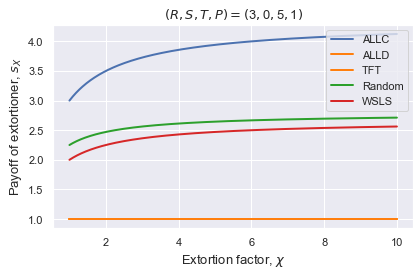

In [23]:
# an example
#payoff_1D(s_X_ext, s_Y_ext, payoff_con_subs, 
          #[Cooperator_q, Defector_q, TitForTat_q, Random_q, WinStayLoseShift_q], 
          #['ALLC', 'ALLD', 'TFT', 'Random', 'WSLS'], np.linspace(1, 10, 501), [], 'con_common_strategies')

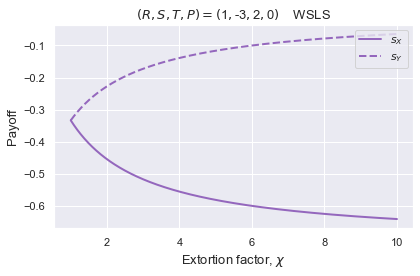

In [24]:
# another example
#payoff_1D(s_X_ext, s_Y_ext, payoff_abn_subs, [WinStayLoseShift_q], ['WSLS'], np.linspace(1, 10, 501), [], 'con_wsls', 4, 'XY')

### Four classes of unbending strategies

#### Class A
* $q_1 = 1$, $q_3 = 0$

In [25]:
def target_A_plot(s_X, payoff_subs = payoff_con_subs, name = 'con', zoom = False, fs = 13.5):
    '''
    Region of class A for a general IPD game
    s_X: payoff of player X
    payoff_subs: values of the four payoffs R, S, T, and P
    name: name of the plot, depending on the relation between T + S and 2P
    zoom: whether to zoom in and see the details of the plot
    fs: font size
    '''
    num, deno = fraction(factor(diff(s_X, chi))) # the derivative of s_X, which takes the form of a rational function
    target  = cancel(num/((T - S)*(R - P)*q_4)) 
    target = collect(target, chi)
    e_2 = collect(target.coeff(chi, 2), q_4)
    e_1 = collect(target.coeff(chi, 1), q_4)
    e_0 = collect(target.coeff(chi, 0), q_4)
    if (2*payoff_subs[3][1] <= payoff_subs[2][1] + payoff_subs[1][1]): # 2P <= T + S
        f = lambdify([q_2, q_4], e_2.subs(payoff_subs), 'numpy')
    else:
        f = lambdify([q_2, q_4], (e_2 + e_1 + e_0).subs(payoff_subs), 'numpy')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.patch.set_facecolor('white')
    x = np.linspace(0, 1, 501)
    y = np.linspace(0, 1, 501)
    if(zoom == True):
        x = np.linspace(0.75, 1, 501)
        y = np.linspace(0, 0.05, 501)
    X, Y = np.meshgrid(x, y)
    plt.imshow(f(X, Y) > 0, extent = (X.min(), X.max(), Y.min(), Y.max()), origin = "lower", cmap = "Pastel1")
    plt.xlabel(r'$q_2$', fontsize = fs - 2)
    plt.ylabel(r'$q_4$', fontsize = fs - 2) 
    Z = f(X, Y)
    contours = plt.contour(X, Y, Z, 5, colors = 'black')
    plt.clabel(contours, inline = True, fontsize = 8, fmt = '%1.2f')
    if(zoom == True):
        plt.imshow(Z, extent = [0.75, 1, 0, 0.05], origin = 'lower', cmap = 'Spectral', alpha = 0.2)
        ax.set_aspect(5)
    else:
        plt.imshow(Z, extent = [0, 1, 0, 1], origin = 'lower', cmap = 'Spectral', alpha = 0.2)
    plt.colorbar()
    title = [payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]]
    title = [str(v) for v in title]
    title = r'$, $'.join(title) 
    plt.title(r'$(R, S, T, P) = ($' + title + r'$)$', fontsize = fs - 2)
    if(name == 'con'):
        plt.text(0.55, 0.05, r'$s_X \curvearrowright$ with $\chi$', size = fs, horizontalalignment = 'center')
    if(zoom == True):
        plt.savefig(_Figure_PATH_ + "target_A_" + name + "_zoom.png", dpi = 400, bbox_inches = 'tight')
    else:
        plt.savefig(_Figure_PATH_ + "target_A_" + name + ".png", dpi = 400, bbox_inches = 'tight')
    plt.show()   

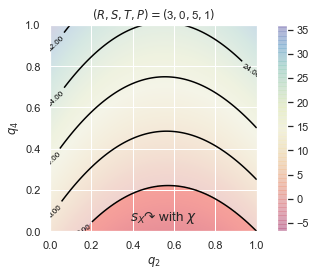

In [26]:
# an example
#target_A_plot(collect(cancel(s_X_ext.subs([(q_1, 1), (q_3, 0)])), chi))

#### Class C
* $q_1 = q_2 = q_3$

In [27]:
def target_C_plot(s_X, payoff_subs = payoff_con_subs, name = 'con', zoom = False, fs = 13.5):
    '''
    Region of class C for a general IPD game
    s_X: payoff of player X
    payoff_subs: values of the four payoffs R, S, T, and P
    name: name of the plot, depending on the relation between T + S and 2P
    zoom: whether to zoom in and see the details of the plot
    fs: font size
    '''
    num, deno = fraction(factor(diff(s_X, chi)))
    target = factor(num/((T - S)*q_4))
    f = lambdify([q_1, q_4], target.subs(payoff_subs), 'numpy')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.patch.set_facecolor('white')
    x = np.linspace(0, 1, 501)
    y = np.linspace(0, 1, 501)
    if(zoom == True):
        x = np.linspace(0.75, 1, 501)
        y = np.linspace(0, 0.05, 501)
    X, Y = np.meshgrid(x, y)
    plt.imshow(f(X, Y) > 0, extent = (X.min(), X.max(), Y.min(), Y.max()), origin = "lower", cmap = "Pastel1")
    plt.xlabel(r'$q_1$', fontsize = fs - 2)
    plt.ylabel(r'$q_4$', fontsize = fs - 2)   
    Z = f(X, Y)
    contours = plt.contour(X, Y, Z, 5, colors = 'black')
    plt.clabel(contours, inline = True, fontsize = 8, fmt = '%1.2f')
    if(zoom == True):
        plt.imshow(Z, extent = [0.75, 1, 0, 0.05], origin = 'lower', cmap = 'Spectral', alpha = 0.2)
        ax.set_aspect(5)
    else:
        plt.imshow(Z, extent = [0, 1, 0, 1], origin = 'lower', cmap = 'Spectral', alpha = 0.2)
    plt.colorbar()
    title = [payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]]
    title = [str(v) for v in title]
    title = r'$, $'.join(title) 
    plt.title(r'$(R, S, T, P) = ($' + title + r'$)$', fontsize = fs - 2)
    if(name == 'con'):
        plt.text(0.7, 0.02, r'$s_X \curvearrowright$ with $\chi$', size = fs, horizontalalignment = 'center')
    if(zoom == True):
        plt.savefig(_Figure_PATH_ + "target_C_" + name + "_zoom.png", dpi = 400, bbox_inches = 'tight')
    else:
        plt.savefig(_Figure_PATH_ + "target_C_" + name + ".png", dpi = 400, bbox_inches = 'tight')
    plt.show()

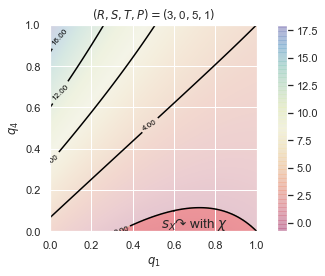

In [28]:
# an example
#target_C_plot(cancel(s_X_ext.subs([(q_2, q_1), (q_3, q_1)])))

#### Class D
* $q_4 = h_D = [-(T + S - 2P)q_1 + (R - P)(q_2 + q_3) + T + S - R - P]/[2R - T - S]$

In [29]:
def target_D_plot(s_X, h_D, payoff_subs = payoff_con_subs, name = 'con', ms = 5, fs = 13.5):
    '''
    Region of class D for a general IPD game
    s_X: payoff of player X
    h_D: as shown above
    payoff_subs: values of the four payoffs R, S, T, and P
    name: name of the plot, depending on the relation between T + S and 2P
    ms: marker size
    fs: font size
    '''
    num, deno = fraction(factor(diff(s_X, chi)))
    target = factor(num/(T - S))
    d_D0, a_D0 = factor_list(target)[1][0][0], factor_list(target)[0]*factor_list(target)[1][1][0]
    f = lambdify([q_1, q_2, q_3], d_D0.subs(payoff_subs), 'numpy')
    g = lambdify([q_1, q_2, q_3], a_D0.subs(payoff_subs), 'numpy')
    hd = lambdify([q_1, q_2, q_3], h_D.subs(payoff_subs), 'numpy')
    points = []
    X = np.linspace(0, 1, 161)
    Y = np.linspace(0, 1, 161)
    Z = np.linspace(0, 1, 161)
    for x in X:
        for y in Y:
            for z in Z:
                if f(x,y,z) <= 0:
                    if g(x,y,z) >= 0:
                        points.append([x, y, z, f(x,y,z), g(x,y,z), hd(x,y,z)])
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    ax = fig.gca(projection = '3d')
    xdata = [item[0] for item in points]
    ydata = [item[1] for item in points]
    zdata = [item[2] for item in points]
    colors = [item[5] for item in points]
    
    # when d_0 = 0 and q_1 = 1
    XD1 = [item[0] for item in points if (abs(item[0] - 1 + item[3]) < 1e-3)]
    YD1 = [item[1] for item in points if (abs(item[0] - 1 + item[3]) < 1e-3)]
    ZD1 = [item[2] for item in points if (abs(item[0] - 1 + item[3]) < 1e-3)]
    ZD1_pr = [1 for item in points if (abs(item[0] - 1 + item[3]) < 1e-3)]
    cD1 = [item[5] for item in points if (abs(item[0] - 1 + item[3]) < 1e-3)]
    # when a_0 = 0 and q_1 = 1
    XA1 = [item[0] for item in points if (item[0] - 1 - item[4] == 0)]
    YA1 = [item[1] for item in points if (item[0] - 1 - item[4] == 0)]
    ZA1 = [item[2] for item in points if (item[0] - 1 - item[4] == 0)]
    cA1 = [item[5] for item in points if (item[0] - 1 - item[4] == 0)]
    # when d_0 = 0 and q_2 = 0
    XD2 = [item[0] for item in points if (abs(-item[1] + item[3]) < 1e-3)]
    YD2 = [item[1] for item in points if (abs(-item[1] + item[3]) < 1e-3)]
    ZD2 = [item[2] for item in points if (abs(-item[1] + item[3]) < 1e-3)]
    ZD2_pr = [1 for item in points if (abs(-item[1] + item[3]) < 1e-3)]
    cD2 = [item[5] for item in points if (abs(-item[1] + item[3]) < 1e-3)]
    # when a_0 = 0 and q_2 = 0
    XA2 = [item[0] for item in points if (-item[1] - item[4] == 0)]
    YA2 = [item[1] for item in points if (-item[1] - item[4] == 0)]
    ZA2 = [item[2] for item in points if (-item[1] - item[4] == 0)]
    cA2 = [item[5] for item in points if (-item[1] - item[4] == 0)]
    # when d_0 = 0 and q_3 = 1
    XD3 = [item[0] for item in points if (abs(item[2] - 1 + item[3]) < 1e-3)]
    YD3 = [item[1] for item in points if (abs(item[2] - 1 + item[3]) < 1e-3)]
    ZD3 = [item[2] for item in points if (abs(item[2] - 1 + item[3]) < 1e-3)]
    cD3 = [item[5] for item in points if (abs(item[2] - 1 + item[3]) < 1e-3)]
    # when q_2 = 0 and q_3 = 1
    XB1 = [item[0] for item in points if (item[2] - 1 - item[1] == 0)]
    YB1 = [item[1] for item in points if (item[2] - 1 - item[1] == 0)]
    ZB1 = [item[2] for item in points if (item[2] - 1 - item[1] == 0)]
    cB1 = [item[5] for item in points if (item[2] - 1 - item[1] == 0)]
    # when q_1 = 1 and q_3 = 1
    XB2 = [item[0] for item in points if (item[0] - 1 + item[2] - 1 == 0)]
    YB2 = [item[1] for item in points if (item[0] - 1 + item[2] - 1 == 0)]
    ZB2 = [item[2] for item in points if (item[0] - 1 + item[2] - 1 == 0)]
    cB2 = [item[5] for item in points if (item[0] - 1 + item[2] - 1 == 0)]
    # when d_0 = a_0 = 0
    XB = [item[0] for item in points if (abs(item[3] - item[4]) < 1e-3)]
    YB = [item[1] for item in points if (abs(item[3] - item[4]) < 1e-3)]
    ZB = [item[2] for item in points if (abs(item[3] - item[4]) < 1e-3)]
    ZB_pr = [1 for item in points if (abs(item[3] - item[4]) < 1e-3)]
    cB = [item[5] for item in points if (abs(item[3] - item[4]) < 1e-3)]
        
    def truncate_colormap(cmap, minval = 0.0, maxval = 1.0, n = 100):
        new_cmap = mcolors.LinearSegmentedColormap.from_list(
            'trunc({n},{a:.2f},{b:.2f})'.format(n = cmap.name, a = minval, b = maxval),
            cmap(np.linspace(minval, maxval, n)))
        return new_cmap
    cmap = cm.get_cmap('viridis_r')
    new_cmap = truncate_colormap(cmap, 0, 0.6)
    cmap_p = cm.get_cmap('magma_r')    
    surf = ax.scatter(xdata, ydata, zdata, s = 0.01, alpha = 0.2, c = colors, cmap = new_cmap, rasterized = True)
    
    if(name != 'abn'):
        ax.plot3D(XB, YB, ZB, c = cmap_p(0.2), linewidth = 2, rasterized = True)  
    else:
        ax.plot3D(XB, YB, ZB, c = cmap_p(0.2), linestyle = ':', linewidth = 2, rasterized = True)
        # q_3 = 1 and a_0 = 0
        XA3 = [item[0] for item in points if (item[2] - 1 - item[4] == 0)]
        YA3 = [item[1] for item in points if (item[2] - 1 - item[4] == 0)]
        ZA3 = [item[2] for item in points if (item[2] - 1 - item[4] == 0)]
        cA3 = [item[5] for item in points if (item[2] - 1 - item[4] == 0)]
        ax.plot3D(XA3, YA3, ZA3, c = cmap_p(0.2), linewidth = 2, rasterized = True)
    ax.plot3D(XD3, YD3, ZD3, c = cmap(0.9), rasterized = True)
    ax.plot3D(XD2, YD2, ZD2, c = cmap(0.9), rasterized = True)
    ax.plot3D(XD2, YD2, ZD2_pr, c = cmap(0.9), linestyle = ':', rasterized = True)
    ax.plot3D(XA2, YA2, ZA2, c = cmap(0.9), rasterized = True)
    ax.plot3D(XD1, YD1, ZD1, c = cmap(0.9), rasterized = True)
    ax.plot3D(XD1, YD1, ZD1_pr, c = cmap(0.9), linestyle = ':', rasterized = True)
    ax.plot3D(XA1, YA1, ZA1, c = cmap(0.9), rasterized = True)
    ax.plot3D(XB1, YB1, ZB1, c = cmap(0.9), rasterized = True)
    ax.plot3D(XB2, YB2, ZB2, c = cmap(0.9), rasterized = True)
    # projections
    ax.plot3D(XB, YB, ZB_pr, c = cmap_p(0.2), linestyle = ':', linewidth = 2, rasterized = True)
    # single point
    ax.plot([XB[0]], [YB[0]], [1], markerfacecolor = cmap(0.9), markeredgecolor = cmap(0.9), marker = 'o', markersize = ms)
    
    title = [payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]]
    title = [str(v) for v in title]
    title = r'$, $'.join(title) 
    ax.set_title(r'$(R, S, T, P) = ($' + title + r'$)$', fontsize = fs - 2)
    ax.set_xlim3d(0, 1)
    ax.set_xlabel(r'$q_1$', fontsize = fs - 2)
    ax.set_ylim3d(0, 1)
    ax.set_ylabel(r'$q_2$', fontsize = fs - 2)
    ax.set_zlim3d(0, 1)
    ax.set_zlabel(r'$q_3$', fontsize = fs - 2, labelpad = 5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.1)
    plt.locator_params(nbins = 5)
    fig.colorbar(surf, shrink = 0.5, aspect = 10, pad = 0.1)
    plt.savefig(_Figure_PATH_ + "target_D_" + name + ".png", dpi = 400, transparent = True, bbox_inches = 'tight')

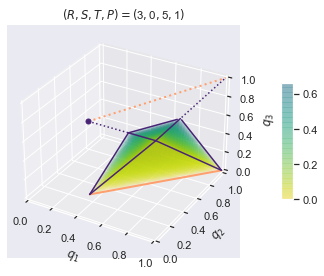

In [30]:
# find h_D
#num, deno = fraction(factor(s_X_ext.subs(phi, phi_upper_con) - s_X_ext.subs(phi, phi_upper_con/2)))
#target_zero = factor(num/(chi*q_4*(T - S)*(T*chi - P*chi + P - S)*(P*chi - S*chi + T - P)))
#factor_1 = factor_list(target_zero)[1][0][0]
#factor_0 = factor_list(target_zero)[1][1][0]*factor_list(target_zero)[0]
#h_D = collect(collect(collect(solve(factor_0, q_4)[0], q_3), q_2), q_1)
# an example
#target_D_plot(cancel(s_X_ext.subs(q_4, h_D)), h_D)

### Donation game

In [31]:
def reactive_plot(ratio, fsize = (6, 6), ms = 25, fs = 18):
    '''
    Region of reactive strategies and that of ZD strategies
    r: benefit-cost ratio b/c
    fsize: figure size
    ms: marker size
    fs: font size
    '''
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    fig.patch.set_facecolor('white')
    k = 0 # color code
    # the points (p_1, p_2)
    A = [1, 0] # equal payoff
    B = [1/ratio, 0] # extortioner (c/b, 0)
    C = [1, 1 - 1/ratio] # complier (1, 1 - c/b)
    # draw the square
    points = [[0, 0], [1, 0], [1, 1], [0, 1]]
    square = plt.Polygon(points, color = colors[7], ec = None, alpha = 0.1)
    ax.add_patch(square)
    # draw the triangle
    points = [A, B, C]
    triangle = plt.Polygon(points, color = colors[k], ec = None, alpha = 0.1)
    ax.add_patch(triangle)
    # draw the lines: Extortioner (AB), Complier (AC), Equalizer (BC)
    k_list = [1, 2, 0]
    angle_list = [0, 90, 45]
    name_list = ['extortioner', 'complier', 'equalizer']
    h_list = [-0.1, -0.07, -0.15]
    v_list = [0.015, -0.15, -0.075]
    for i, line in enumerate([(A, B), (A, C), (B, C)]):
        line_temp = plt.Line2D((line[0][0], line[1][0]), (line[0][1], line[1][1]), c = colors[k_list[i]], lw = 3, ls = '-', marker = '.', markersize = 0, alpha = 1)
        ax.add_line(line_temp)
        if ratio >= 2:
            plt.text((line[0][0] + line[1][0])/2 + h_list[i], (line[0][1] + line[1][1])/2 + v_list[i], name_list[i], color = colors[k_list[i]], rotation = angle_list[i], fontsize = fs)
    # draw the points
    plt.plot(A[0], A[1], c = colors[k], marker = '.', markersize = ms)
    plt.plot(B[0], B[1], c = colors[k], marker = '.', markersize = ms)
    plt.plot(C[0], C[1], c = colors[k], marker = '.', markersize = ms)
    plt.text(A[0] + 0.03, A[1] - 0.03, 'A', fontsize = fs - 2)
    plt.text(B[0] - 0.06, B[1] - 0.03, 'B', fontsize = fs - 2)
    plt.text(C[0] + 0.03, C[1] + 0.03, 'C', fontsize = fs - 2)
    # equalize the scales of x-axis and y-axis
    ax.set_aspect('equal', adjustable = 'box')
    ax.set_xlim(-0.08, 1.08)
    ax.set_ylim(-0.08, 1.08)
    ax.set_xlabel(r'$p_1$', fontsize = fs - 2)
    ax.set_ylabel(r'$p_2$', fontsize = fs - 2)
    ax.tick_params(axis = 'both', which = 'major', labelsize = fs - 4)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = fs - 4)
    plt.title(r'$r = b/c = $' + str(ratio), fontsize = fs)
    plt.savefig(_Figure_PATH_ + "reactive_" + str(ratio).replace('.', '_') + ".png", dpi = 400, bbox_inches = 'tight')
    plt.show()

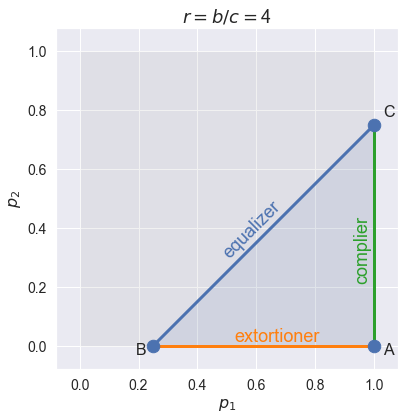

In [159]:
# an example
#ratio = 4
#reactive_plot(ratio, fsize = (6, 6), ms = 25, fs = 18)

In [79]:
def target_A_re_plot(s_X_ext, s_X_re, ratio, fsize = (6, 6), ms = 20, fs = 18):
    '''
    Region of class A for the donation game
    Player X uses a reactive strategy and player Y uses an unbending strategy 
    s_X_ext: payoff of player X if X uses an extortionate ZD strategy
    s_X_re: payoff of player X if X uses a reactive strategy
    ratio: benefit-cost ratio
    fsize: figure size
    ms: marker size
    fs: font size
    '''
    # find the upper bound of q_4 so that (b - c) is the maximum value of the payoff of player X
    Delta = factor((s_X_re - (b - c)))
    Delta = Delta*((1 - q_2)*(1 - p_1 - q_4*(p_2 - p_1)**2) + q_4*(1 - p_2))
    Delta = cancel(Delta/(1 - p_1))
    Ff = lambdify([q_2], solve(Delta.subs([(p_1, 0), (p_2, 0)]), q_4)[0].subs([(b, ratio), (c, 1)]), 'numpy')
    # find the upper bound of q_4 for the unbending strategies
    num, deno = fraction(factor(diff(s_X_ext, chi)))
    target  = cancel(num/((T - S)*(R - P)*q_4))
    target = collect(target, chi)
    e_2 = collect(target.coeff(chi, 2), q_4)
    e_1 = collect(target.coeff(chi, 1), q_4)
    e_0 = collect(target.coeff(chi, 0), q_4)
    F = lambdify([q_2], solve(e_2, q_4)[0].subs(payoff_dg_subs).subs([(b, ratio), (c, 1)]), 'numpy')
    # find the upper bound of q_4 so that the partial derivative of s_X wrt to p_1 at (0, 0) is non-negative
    num, deno = fraction(factor((diff(s_X_re.subs(p_2, 0), p_1)).subs(p_1, 0)))
    num = cancel(num/q_4)
    f = lambdify([q_2], solve(num, q_4)[0].subs([(b, ratio), (c, 1)]), 'numpy')
    
    sns.set_style("darkgrid")
    fig = plt.figure(figsize = fsize)
    ax = fig.add_subplot(111)
    fig.patch.set_facecolor('white')
    # transparency
    a = 0.1
    # p is a reactive strategy
    k = 7
    x = np.linspace(0, 1, 101)
    y = Ff(x)
    y = np.where(y > 1, 1, y) # replace it with 1
    # draw the boundary curve for s_X <= b - c
    Ff_plt = ax.plot(x, y, color = colors[k], linewidth = 3, alpha = a*8, label = r'$h_{Aa}$')
    # draw the region
    ax.fill_between(x, y, color = colors[k], alpha = a)
    # add the legend
    Ff_patch = mpatches.Patch(color = colors[k], alpha = a*2, label = r'$s_X \leq b - c$')
    # p is an extortionate ZD strategy
    k = 0
    q_2_temp = (T + S - 2*P)*(P - S)/((T - P)*(T - S) - (P - S)**2)
    q_2_temp = float(q_2_temp.subs(payoff_dg_subs).subs([(b, ratio), (c, 1)]))
    x = np.linspace(q_2_temp, 1, 101)
    y = F(x)
    y = np.where(y > 1, 1, y) # replace with 1
    # draw the boundary curve for extortionate ZD strategies
    F_plt = ax.plot(x, y, color = colors[k], linewidth = 3, alpha = a*4, label = r'$h_A$')
    # draw the region
    ax.fill_between(x, y, color = colors[k], alpha = a)
    # add the legend
    F_patch = mpatches.Patch(color = colors[k], alpha = a*2, label = 'unbending')
    # the partial derivative of s_X wrt to p_1 at (0, 0) is non-negative
    k = 0
    q_2_temp = c/b
    q_2_temp = float(q_2_temp.subs([(b, ratio), (c, 1)]))
    x = np.linspace(q_2_temp, 1, 101)
    y = f(x)
    # draw the boundary curve for partial derivative >= 0
    f_plt = ax.plot(x, y, color = colors[k], linewidth = 3, alpha = a*8, label = r'$h_a$')
    # draw the region
    ax.fill_between(x, y, color = colors[k], alpha = a*4)
    # add the legend
    f_patch = mpatches.Patch(color = colors[k], alpha = a*8, label = r'$\frac{\partial s_X(0, 0)}{\partial p_1} \geq 0$')
    
    plt.legend(handles = [Ff_patch, F_patch, f_patch, Ff_plt[0], F_plt[0], f_plt[0]], ncol = 2, loc = 'upper right', fancybox = True, fontsize = fs - 4)
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xlabel(r'$q_2$', fontsize = fs - 2)
    ax.set_ylabel(r'$q_4$', fontsize = fs - 2) 
    ax.tick_params(axis = 'both', which = 'major', labelsize = fs - 4)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = fs - 4)
    if ratio != (1 + np.sqrt(5))/2:
        plt.title(r'$r = b/c = $' + str(ratio), fontsize = fs)
        plt.savefig(_Figure_PATH_ + "target_A_re_" + str(ratio).replace('.', '_')  + ".png", dpi = 400, bbox_inches = 'tight')
    else:
        plt.title(r'$r = b/c = (1 + \sqrt{5})/{2}$', fontsize = fs)
        plt.savefig(_Figure_PATH_ + "target_A_re_" + 'golden' + ".png", dpi = 400, bbox_inches = 'tight')
    plt.show()    

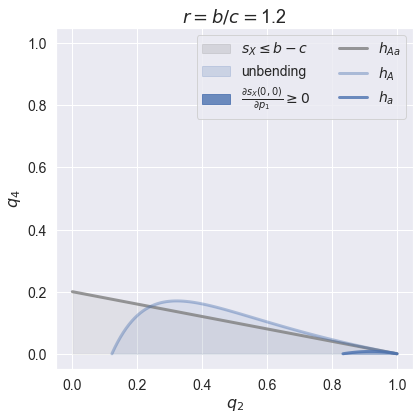

In [80]:
# an example
#s_XA_ext = cancel(s_X_ext.subs([(q_1, 1), (q_3, 0)]))
#s_XA_re = cancel(s_X_re.subs([(q_1, 1), (q_3, 0)]))
#target_A_re_plot(s_XA_ext, s_XA_re, 1.2)

In [32]:
def s_X_stream(s_X, ratio, q_subs, cmap = 'viridis', d = 0.325, asize = 2, ms = 25, fsize = (6, 6), fs = 18, tag = 'A'):
    '''
    Stream plot of the partial derivatives of s_X wrt p_1 and p_2
    Player X uses a reactive strategy and player Y uses an unbending strategy
    s_X: payoff of player X
    ratio: benefit-cost ratio
    q_subs: values of the four probabilities q_1, q_2, q_3, q_4 (strategy used by player Y)
    cmap: color map
    d: density
    asize: arrow size
    ms: marker size
    fsize: figure size
    fs: font size
    tag: name of the plot
    '''
    s_X = factor(s_X.subs([(b, ratio), (c, 1)]).subs(q_subs))
    error = 1e-10
    x = np.linspace(error, 1 - error, 500)
    y = np.linspace(error, 1 - error, 500)
    X, Y = np.meshgrid(x, y)
    lam_diff_1 = lambdify([p_1, p_2], diff(s_X, p_1))
    lam_diff_2 = lambdify([p_1, p_2], diff(s_X, p_2))
    U = lam_diff_1(X, Y)
    V = lam_diff_2(X, Y)
    # vary the color along a streamline: the color corresponds to the payoff of player X
    lam_s_X = lambdify([p_1, p_2], s_X)
    SS = lam_s_X(X, Y)
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    fig.patch.set_facecolor('white')
    # line width
    lw = 3
    # draw the stream lines
    stream = ax.streamplot(X, Y, U, V, color = SS, cmap = cmap, density = d, arrowsize = asize, linewidth = lw)
    cs = cm.get_cmap(cmap)
    # draw the transition point: the partial derivative wrt p_1 at (p_1, 0) = 0
    k = np.argmax(U[0, :] >= 0) # first occurrence of the derivative greater than or equal to 0
    if k > 0:
        plt.plot(X[0][k], error, c = cs(0.5), marker = '.', markersize = ms)
    if ('A' in tag) | ('a' in tag):   
        # draw (c/b, 0)
        plt.plot(1/ratio, error, c = cs(0.5), marker = '.', fillstyle = 'none', markeredgewidth = lw, markersize = ms - 2)
    # draw the maximum value point
    i, j = np.unravel_index(SS.argmax(), SS.shape)
    plt.plot(X[i][j], Y[i][j], c = cs(0.999), marker = '.', markersize = ms)
    
    title = [q_subs[0][1], q_subs[1][1], q_subs[2][1], q_subs[3][1]]
    title = [str(v) for v in title]
    title = r'$, $'.join(title) 
    plt.title(r'$r = b/c = $' + str(ratio) + '    ' + r'$q = ($' + title + r'$)$', fontsize = fs - 2)
    
    # create an axes on the right side of ax (cax)
    # width of cax: 5% of ax, padding between cax and ax: fixed at 0.1 inch
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size = "5%", pad = 0.1)
    fig.colorbar(stream.lines, cax = cax)
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xlabel(r'$p_1$', fontsize = fs - 2)
    ax.set_ylabel(r'$p_2$', fontsize = fs - 2)
    ax.tick_params(axis = 'both', which = 'major', labelsize = fs - 4)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = fs - 4)
    plt.savefig(_Figure_PATH_ + 'payoff_stream_' + str(ratio).replace('.', '_') + '_' + tag + '.png', 
                dpi = 400, bbox_inches = 'tight')
    fig.show()

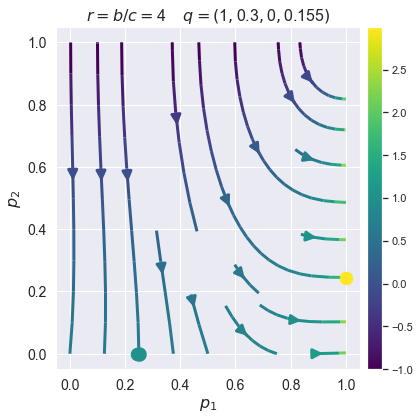

In [33]:
# an example
#ratio = 4
#s_XA_re = cancel(s_X_re.subs([(q_1, 1), (q_3, 0)]))
#q_subs_A_re_ax = [(q_1, 1), (q_2, 0.3), (q_3, 0), (q_4, 0.155)]
#s_X_stream(s_XA_re, ratio, q_subs_A_re_ax, cmap = 'viridis', tag = 'ax')

In [34]:
def s_X_stream_ZD(s_X, ratio, q_subs, cmap = 'viridis', d = 0.325, asize = 2, ms = 25, fsize = (6, 6), fs = 18, tag = 'A'):
    '''
    Stream plot of the partial derivatives of s_X wrt O and chi
    Player X uses a reactive ZD strategy and player Y uses an unbending strategy
    s_X: payoff of player X
    ratio: benefit-cost ratio
    q_subs: values of the four probabilities q_1, q_2, q_3, q_4 (strategy used by player Y)
    cmap: color map
    d: density
    asize: arrow size
    ms: marker size
    fsize: figure size
    fs: font size
    tag: name of the plot
    '''
    s_X = factor(s_X.subs([(b, ratio), (c, 1)]).subs(q_subs))
    error = 1e-10
    x = np.linspace(error, ratio - 1 - error, 500) # O: 0 <= O <= b - c
    y = np.linspace(1 + error, 5 - error, 500) # chi: chi >= 1
    X, Y = np.meshgrid(x, y)
    lam_diff_1 = lambdify([O, chi], diff(s_X, O))
    lam_diff_2 = lambdify([O, chi], diff(s_X, chi))
    U = lam_diff_1(X, Y)
    V = lam_diff_2(X, Y)
    # vary the color along a streamline: the color corresponds to the payoff of player X
    lam_s_X = lambdify([O, chi], s_X)
    SS = lam_s_X(X, Y)
    
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    fig.patch.set_facecolor('white')
    # color code
    cs = cm.get_cmap(cmap)
    def cs_color(O, chi): # the color at point (p_1, p_2) corresponds to the payoff of player X 
        return cs((lam_s_X(O, chi) - np.min(SS))/(np.max(SS) - np.min(SS)))
    # line width
    lw = 3
    # arrow style
    arrow_kw = dict(arrowstyle = '-|>', linewidth = lw, mutation_scale = 10*asize)
    if 'D' in tag:
        ps = np.linspace(5, 1, 40)
        for i, x in enumerate(ps[:-1]):
            if i % 5 == 4:
                a_bottom = mpatches.FancyArrowPatch((0, x), (0, ps[i + 1] - 0.01), **arrow_kw, color = cs_color(0, x))
                ax.add_patch(a_bottom)
            line_bottom = plt.Line2D((0, 0), (x, ps[i + 1]), c = cs_color(0, x), lw = lw, alpha = 1, zorder = 100)
            ax.add_line(line_bottom)
    if 'D' == tag:
        ps = np.linspace(1, 5, 40)
        for i, x in enumerate(ps[:-1]):
            if i % 5 == 4:
                a_top = mpatches.FancyArrowPatch((ratio - 1, x), (ratio - 1, ps[i + 1] + 0.01), **arrow_kw, color = cs_color(ratio - 1, x))
                ax.add_patch(a_top)
            line_top = plt.Line2D((ratio - 1, ratio - 1), (x, ps[i + 1]), c = cs_color(ratio - 1, x), lw = lw, alpha = 1, zorder = 100)
            ax.add_line(line_top)
    # draw the stream lines
    stream = ax.streamplot(X, Y, U, V, color = SS, cmap = cmap, density = d, arrowsize = asize, linewidth = lw)
    # draw the transition point (line) \partial s_X/ \partial chi = 0
    k = np.argmax(V[0, :] >= 0) # first occurrence of derivative greater than or equal to 0
    if k > 0:
        ps = np.linspace(1, 5, 21)
        for i, x in enumerate(ps[:-1]):
            line_temp = plt.Line2D((X[0][k], X[0][k]), (x, ps[i + 1]), c = cs_color(X[0][k], x), lw = lw, ls = '--', alpha = 1)
            ax.add_line(line_temp)
        plt.plot(X[0][k], 1, c = cs_color(X[0][k], 1), marker = '.', markersize = ms)
    title = [q_subs[0][1], q_subs[1][1], q_subs[2][1], q_subs[3][1]]
    title = [str(v) for v in title]
    title = r'$, $'.join(title) 
    plt.title(r'$r = b/c = $' + str(ratio) + '    ' + r'$q = ($' + title + r'$)$', fontsize = fs - 2)
    # create an axes on the right side of ax (cax)
    # width of cax: 5% of ax; padding between cax and ax: fixed at 0.1 inch
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size = "5%", pad = 0.1)
    fig.colorbar(stream.lines, cax = cax)
    ax.set_xlim(-0.15, ratio - 1 + 0.15)
    ax.set_ylim(0.8, 5.2)
    ax.set_xlabel('Baseline payoff, ' + r'$O$', fontsize = fs - 2)
    ax.set_ylabel('Extortion factor, ' + r'$\chi$', fontsize = fs - 2)
    ax.tick_params(axis = 'both', which = 'major', labelsize = fs - 4)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = fs - 4)
    plt.savefig(_Figure_PATH_ + 'payoff_stream_ZD_' + str(ratio).replace('.', '_') + '_' + tag + '.png', 
                dpi = 400, bbox_inches = 'tight')
    fig.show()

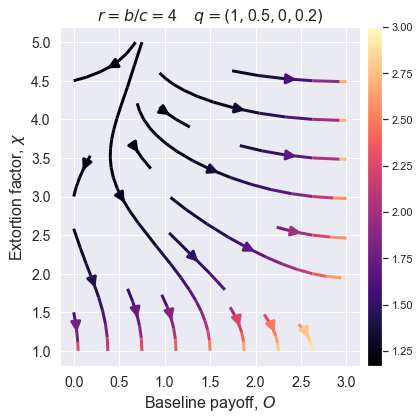

In [35]:
# an example
#ratio = 4
#s_XA_re_ZD = cancel(s_X_re_ZD.subs([(q_1, 1), (q_3, 0)]))
#q_subs_A_re_A = [(q_1, 1), (q_2, 0.5), (q_3, 0), (q_4, 0.2)] 
#s_X_stream_ZD(s_XA_re_ZD, ratio, q_subs_A_re_A, cmap = 'magma', tag = 'A')

### $P < O < R$

In [36]:
def target_S_plot(s_X, payoff_subs, cmap, fsize = (6, 4), fs = 13.5, name = 'con'):
    '''
    Region of Class S for a general IPD game and a general ZD strategy
    s_X: payoff of player X
    payoff_subs: values of the four payoffs R, S, T, and P
    cmap: color map
    fsize: figure size
    fs: font size
    name: name of the plot
    '''
    temp = factor_list(fraction(factor(s_X.subs(q_3, q_2) - s_X_gen.subs(q_3, q_2).subs(phi, 0)))[0])[1][5][0]
    q_1_sub = solve(solve(temp.coeff(chi, 1), q_4)[0] - solve(temp.coeff(chi, 0), q_4)[0], q_1)[1]
    q_4_sub = solve(solve(temp.coeff(chi, 1), q_1)[0] - solve(temp.coeff(chi, 0), q_1)[0], q_4)[1]
    f_1 = lambdify([O, q_2], q_1_sub.subs(payoff_subs), 'numpy')
    f_4 = lambdify([O, q_2], q_4_sub.subs(payoff_subs), 'numpy')
    e = 1e-3
    n = 4000
    os = np.linspace(payoff_subs[3][1] + e, payoff_subs[0][1] - e, n + 1) # P < O < R
    qs = np.linspace(0, 1, n + 1)
    os, qs = np.meshgrid(os, qs)
    X = f_1(os, qs)
    Y = qs
    Z = f_4(os, qs)
    for i in range(0, os.shape[0]):
        for j in range(0, os.shape[1]):
            if (X[i][j] < 0) | (X[i][j] > 1):
                X[i][j] = X[i - 1][j]
                Y[i][j] = Y[i - 1][j]
                Z[i][j] = Z[i - 1][j]
    for i in reversed(range(0, os.shape[0])):
        for j in range(0, os.shape[1]):
            if (Z[i][j] < 0) | (Z[i][j] > 1):
                X[i][j] = X[i + 1][j]
                Y[i][j] = Y[i + 1][j]
                Z[i][j] = Z[i + 1][j]         
    def truncate_colormap(cmap, minval = 0.0, maxval = 1.0, n = 100):
        new_cmap = mcolors.LinearSegmentedColormap.from_list(
            'trunc({n},{a:.2f},{b:.2f})'.format(n = cmap.name, a = minval, b = maxval),
            cmap(np.linspace(minval, maxval, n)))
        return new_cmap
    ncmap = cm.get_cmap(cmap)
    new_cmap = truncate_colormap(ncmap, 0.2, 1)
    scamap = cm.ScalarMappable(cmap = new_cmap)
    fcolors = scamap.to_rgba(os)
    
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    ax = fig.gca(projection = '3d')
    #ax.set_box_aspect((1.25, 1, 0.75))
    surf = ax.plot_surface(X, Y, Z, rstride = 200, cstride = 200, 
                           facecolors = fcolors, cmap = new_cmap, shade = False,
                           edgecolor = 'none', alpha = 0.2)
    
    # curves for O = P + e, (R + P)/2, and R - e
    ax.plot(X[:, 0], Y[:, 0], Z[:, 0], linewidth = 3, color = new_cmap(0.01), label = r'$O = P + \epsilon$')
    ax.plot(X[:, int(n/2)], Y[:, int(n/2)], Z[:, int(n/2)], linewidth = 3, color = new_cmap(0.5), label = r'$O = (R + P)/2$')
    ax.plot(X[:, -1], Y[:, -1], Z[:, -1], linewidth = 3, color = new_cmap(0.99), label = r'$O = R - \epsilon$')
    title = [payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]]
    title = [str(v) for v in title]
    title = r'$, $'.join(title) 
    ax.set_title(r'$(R, S, T, P) = ($' + title + r'$)$', fontsize = fs - 2)
    plt.legend(loc = 'upper left', bbox_to_anchor = (0, 1), ncol = 1, fancybox = True, fontsize = fs - 4)
    ax.set_xlim3d(0, 1)
    ax.set_xlabel(r'$q_1$', fontsize = fs - 2)
    ax.set_ylim3d(0, 1)
    ax.set_ylabel(r'$q_2$', fontsize = fs - 2)
    ax.set_zlim3d(0, 1)
    ax.set_zlabel(r'$q_4$', fontsize = fs - 2, labelpad = 5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.1)
    scamap.set_array([])
    plt.locator_params(nbins = 5)
    plt.colorbar(scamap, shrink = 0.5, aspect = 10, pad = 0.1)
    plt.savefig(_Figure_PATH_ + "target_S_" + name + ".png", dpi = 400, transparent = True, bbox_inches = 'tight')

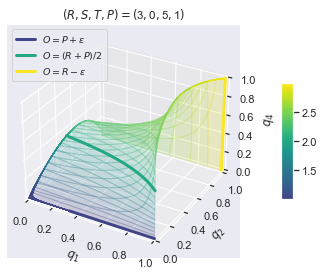

In [37]:
# an example
#target_S_plot(s_X_gen, payoff_con_subs, 'viridis')